# Project: Medical Appointment No-Shows Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains records of medical appointments in Brazil, the gender of the patient, their age, whether they have certain ailments or not, the date of the appointment, etc.
> There are multiple ways we can investigate this dataset, these are a couple of them.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling and Cleaning

In [2]:
df = pd.read_csv(r'medapp.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#drop patientID and AppointmentID columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [6]:
#Transforming Strings to Datetime objects
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.tz_localize(None)
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None)
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [7]:
#Mapping the NoShows as 1 -> Yes, 0-> No
df['NoShowNum']=df['No-show'].map(dict(Yes=1, No=0))

In [8]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShowNum
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [9]:
#removing age otliers
df=df[(df.Age > 0) & (df.Age < 100)]

<a id='eda'></a>
## Exploratory Data Analysis


### What is the Show to No-Show ratio?

In [88]:
print(f'{(1-df.NoShowNum.mean())*100:.2f}% of appointees showed up')

79.74% of appointees showed up


### Who books more appointments, males or females? And Which is more committed?

In [92]:
df.groupby('Gender')['ScheduledDay'].count()

Gender
F    70109
M    36867
Name: ScheduledDay, dtype: int64

In [93]:
numfem=70109
nummale=36867

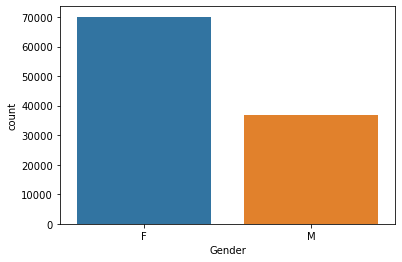

In [14]:
sns.countplot(x=df.Gender);

Females book more appointments

In [29]:
df.groupby(['Gender', 'No-show'])['NoShowNum'].count()

Gender  No-show
F       No         55837
        Yes        14272
M       No         29462
        Yes         7405
Name: NoShowNum, dtype: int64

In [89]:
print(f"{14272/(14272+55837)*100:.2f}% of the Females didn't show up")
print(f"{7405/(7405+29462)*100:.2f}% of the Males didn't show up")

20.36% of the Females didn't show up
20.09% of the Males didn't show up


There's no difference in commitment between Males and Females

### What is the most common ailment among the appointees?


In [42]:
ailments=df.describe()[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].loc['mean']*100
ailments

Hipertension    20.378403
Diabetes         7.425030
Alcoholism       3.140891
Handcap          2.292103
Name: mean, dtype: float64

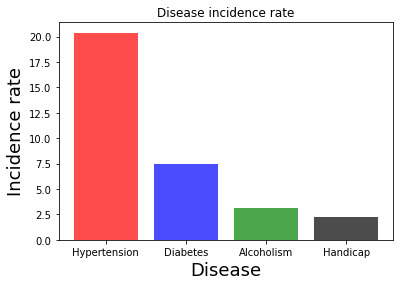

In [45]:
colors = ['red', 'blue', 'green', 'black']
locations = [1, 2, 3, 4]
heights = ailments
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('Disease incidence rate')
plt.xlabel('Disease', fontsize=18)
plt.ylabel('Incidence rate', fontsize=18)
plt.xticks(locations, labels);

Hypertension (high-blood pressure) is the most common ailment

### Does age affect the porbability of having Hyptertension?


In [47]:
df_hyper=df[df.Hipertension == 1]

In [55]:
df_hyper.Age.describe()

count    21800.000000
mean        60.611101
std         13.925205
min          4.000000
25%         52.000000
50%         61.000000
75%         70.000000
max         99.000000
Name: Age, dtype: float64

Text(0, 0.5, 'No. of people with Hyptertension')

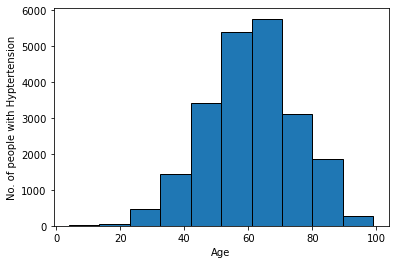

In [62]:
plt.hist(x=df_hyper.Age, ec='black')
plt.xlabel('Age')
plt.ylabel('No. of people with Hyptertension')

Hyptertension seems to affect more people between the ages of 50 and 70

### Does age affect the porbability of having Diabetes?


In [56]:
df_dia=df[df.Diabetes == 1]

In [57]:
df_dia.Age.describe()

count    7943.000000
mean       61.372529
std        13.597400
min         1.000000
25%        53.000000
50%        62.000000
75%        70.000000
max        99.000000
Name: Age, dtype: float64

Text(0, 0.5, 'No. of people with Diabetes')

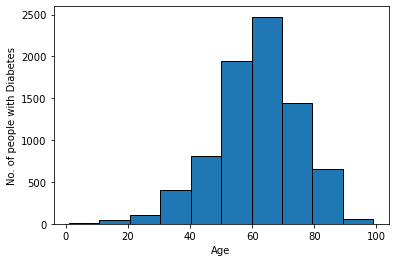

In [63]:
plt.hist(x=df_dia.Age, ec='black')
plt.xlabel('Age')
plt.ylabel('No. of people with Diabetes')

Similar Distribution to Hypertension

### Does age affect the porbability of being an Alcaholic?


In [59]:
df_alc=df[df.Alcoholism == 1]

In [60]:
df_alc.Age.describe()

count    3360.000000
mean       49.593750
std        12.707679
min         4.000000
25%        41.000000
50%        50.000000
75%        59.000000
max        85.000000
Name: Age, dtype: float64

Text(0, 0.5, 'No. of people with Alcoholism')

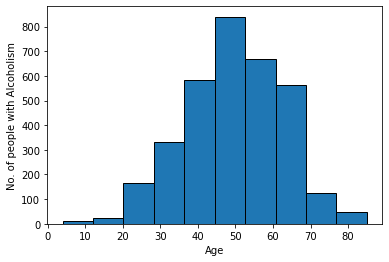

In [69]:
plt.hist(x=df_alc.Age, ec='black')
plt.xlabel('Age')
plt.ylabel('No. of people with Alcoholism')

Alcoholism seems to affect more people in their 40s to ones in their 60s, and peaks at people in their 50s

### Is there any correlation between age and Handicaps?


In [70]:
df_han=df[df.Handcap == 1]

In [71]:
df_han.Age.describe()

count    2035.000000
mean       50.705651
std        21.968207
min         1.000000
25%        34.000000
50%        52.000000
75%        68.000000
max        96.000000
Name: Age, dtype: float64

Text(0, 0.5, 'No. of people with Handicaps')

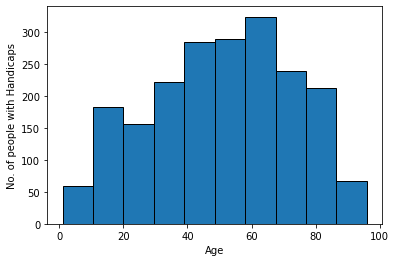

In [72]:
plt.hist(x=df_han.Age, ec='black')
plt.xlabel('Age')
plt.ylabel('No. of people with Handicaps')

Handicaps don't seem to be concentrated in a particular age group

### Does gender affect the probability of having hypertension?


In [85]:
df_hyper.groupby('Gender')['ScheduledDay'].count()

Gender
F    15338
M     6462
Name: ScheduledDay, dtype: int64

In [101]:
numfem_hyper=15338
nummale_hyper=6462
hyper_gender_per=[(numfem_hyper/numfem)*100, (nummale_hyper/nummale)*100]
hyper_gender_per

[21.877362392845427, 17.527870453250873]

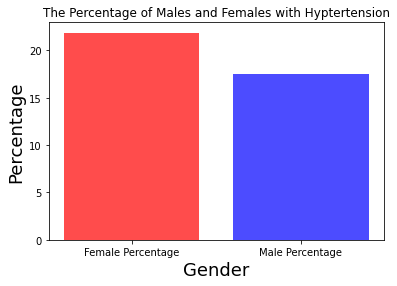

In [102]:
colors = ['red', 'blue']
locations = [1, 2]
heights = hyper_gender_per
labels = ['Female Percentage', 'Male Percentage']
plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('The Percentage of Males and Females with Hyptertension')
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.xticks(locations, labels);

21% of Females have hypertension, while 17% of Males have it

### Does gender affect the probability of having Diabetes?


In [103]:
df_dia.groupby('Gender')['ScheduledDay'].count()

Gender
F    5606
M    2337
Name: ScheduledDay, dtype: int64

In [104]:
numfem_dia=5606
nummale_dia=2337
dia_gender_per=[(numfem_dia/numfem)*100, (nummale_dia/nummale)*100]
dia_gender_per

[7.9961203269195105, 6.339002359833998]

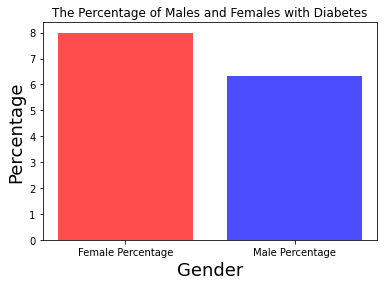

In [105]:
colors = ['red', 'blue']
locations = [1, 2]
heights = dia_gender_per
labels = ['Female Percentage', 'Male Percentage']
plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('The Percentage of Males and Females with Diabetes')
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.xticks(locations, labels);

8% of Females have Diabetes, while 6.3% of Males have it

### Does gender affect Alcoholism?


In [106]:
df_alc.groupby('Gender')['ScheduledDay'].count()

Gender
F    1223
M    2137
Name: ScheduledDay, dtype: int64

In [107]:
numfem_alc=1223
nummale_alc=2137
alc_gender_per=[(numfem_alc/numfem)*100, (nummale_alc/nummale)*100]
alc_gender_per

[1.7444265358227902, 5.796511785607724]

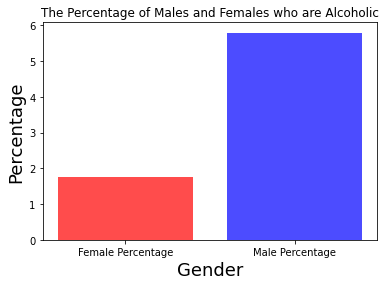

In [108]:
colors = ['red', 'blue']
locations = [1, 2]
heights = alc_gender_per
labels = ['Female Percentage', 'Male Percentage']
plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('The Percentage of Males and Females who are Alcoholic')
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.xticks(locations, labels);

1.7% of Females are alcoholic, while 5.7% of Males are

### How many people have scholarships?

In [110]:
df.groupby('Scholarship')['ScheduledDay'].count()

Scholarship
0    96167
1    10809
Name: ScheduledDay, dtype: int64

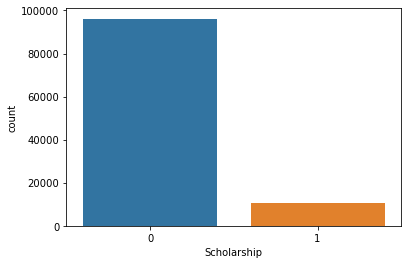

In [112]:
sns.countplot(x=df.Scholarship);

Many more people don't have scholarships

### What are the top 5 Neighbourhoods with the highest number of appointments?

In [118]:
top5neigh=df.groupby('Neighbourhood')['ScheduledDay'].count().sort_values(ascending=False).head()
top5neigh

Neighbourhood
JARDIM CAMBURI     7586
MARIA ORTIZ        5562
RESISTÊNCIA        4235
JARDIM DA PENHA    3851
ITARARÉ            3412
Name: ScheduledDay, dtype: int64

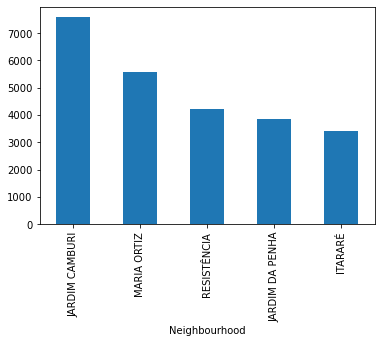

In [125]:
top5neigh.plot.bar();

### Is there a correlation between the day and the appointees not showing up?

In [126]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,NoShowNum
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0


In [131]:
df['Weekday']=df['AppointmentDay'].dt.day_name()

In [132]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,NoShowNum,Weekday
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday


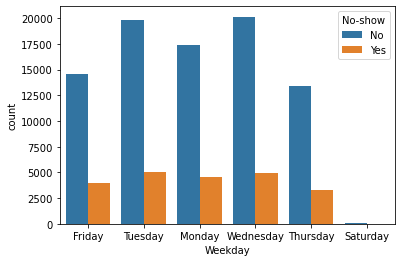

In [138]:
sns.countplot(x=df.Weekday, hue=df['No-show']);

There seems to be no correlation

### Is there a correlation between appointees attending and them receiving an SMS?

In [142]:
df.groupby(['SMS_received', 'No-show'])['ScheduledDay'].count()

SMS_received  No-show
0             No         60284
              Yes        12109
1             No         25015
              Yes         9568
Name: ScheduledDay, dtype: int64

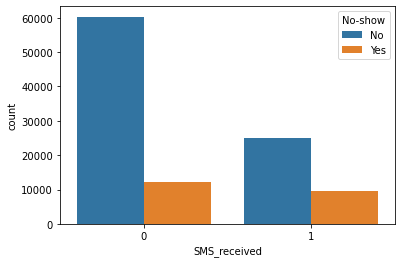

In [139]:
sns.countplot(x=df.SMS_received, hue=df['No-show']);

More people showed up when they didn't receive an SMS.

<a id='conclusions'></a>
## Conclusions
<br><br>
**79.74% of appointees showed up**, which indicates that most people care about attending their medical appointments.

**Females book more appointments**, which might indicate that females care more about their health than males do.

**There's no difference in commitment between the genders**, so the likelyhood that a male or a female attend the scheduled appointment is the same, as long as it's already booked.

**Hypertension is the most common ailment among the appointees**, one out of 5 people who've booked an appointment suffered from blood pressure.

**Hyptertension seems to affect more people between the ages of 50 and 70**, which makes sense considering the chance of having high blood pressure increases with age

**Diabetes has a similar distribution to Hypertension**, which supports the fact that a person with high blood pressure might develop diabetes due to insulin resistance.

**Alcoholism seems to affect more people in their 40s to ones in their 60s, and peaks at people in their 50s.** Such finding needs further investigation in the sociological conditions of the societal sample respresented in the data.

**Handicaps don't seem to be concentrated in a particular age group.** Such finding can be studied more after understanding the nature of the recorded handicaps.

**21% of Females have hypertension, while 17% of Males have it.**
**8% of Females have Diabetes, while 6.3% of Males have it.**
The difference between the genders in the last 2 findings might indicate some genetic propensity for females to develop high blood pressure and diabetes.

**1.7% of Females are alcoholic, while 5.7% of Males are**, which means more males than females are alcoholic in their middle age.

**Many more of the appointees don't have scholarships**, which might indicate that not many people are offered scholarships, or the fact that such clinics are attended more by richer people.

**The top 5 neighbourhoods with the highest number of appointments are JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA, and ITARARÉ.**

**There's no visible correlation between the day of the appointment and the appointees not showing up**, except the fact that there are much fewer appointments on Saturdays, and there are no appointments on Sundays.

**More people showed up when they didn't receive an SMS.** Further investigation is needed in such finding to figure out what the content of the SMS was, and how it affected the No-Show rate.